Завдання

https://cms.ucu.edu.ua/mod/vpl/view.php?id=306617

Розробити функцію sieve_flavius(n) для побудови списку вдалих чисел (lucky number), що не перевищують задане число n (можна вважати, що на вхід завжди буде невідʼємне ціле число).

В теорії чисел вдале число — натуральне число з множини, яку генерує решето подібне до решета Ератосфена, яке генерує прості числа. Процес побудови починається з запису повного списку натуральних чисел: 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,…

Далі здійснюються наступні дії:
Перше число 1 - вважається вдалим.

Кожне друге число (всі парні числа) викреслюються, і залишаються тільки непарні числа: 1,3,5,7,9,11,13,15,17,19,21,23,25

Друге число в послідовності — число 3. Число 3 - вважається вдалим.
Визначаються числа, які є третіми у поточному списку. Число 1 - перше, 3 - друге, 5 - третє, ...

Кожне третє число, викреслюється з послідовності: 1,3,7,9,13,15,19,21,25

Наступне число 7 - вважається вдалим.
Всі сьомі числа викреслюються з послідовності: 1,3,7,9,13,15,21,25

Процедура повторюється поки не буде досягнуто число n

Всі числа які залишилися це вдалі числа: 1,3,7,9,13,15,21,25,31,33,37,43,49,51,63,67,69,73,75,79,87,93,99,…


Код, який не працює

In [1]:
'''
Finds lucky numbers
'''
def sieve_flavius(n: int) -> list[int]:
    '''
    int -> list[int]

    Returns list of lucky numbers

    >>> sieve_flavius(100)
    [1, 3, 7, 9, 13, 15, 21, 25, 31, 33, 37, 43, 49, 51, 63, 67, 69, 73, 75, 79, 87, 93, 99]
    '''
    lst = [i for i in range(1, n + 1) if i % 2 != 0]
    try:
        res_lst = [lst[0], lst[1]]
    except IndexError:
        return []
    lst1 = []
    while True:
        lst1 = lst.copy()
        for g, i in enumerate(lst):
            if (g + 1) % res_lst[-1]:
                lst1.remove(i)
        lst = lst1.copy()
        lst2 = res_lst.copy()
        for t in lst:
            if t not in res_lst:
                res_lst.append(t)
                break
        if res_lst == lst2:
            return res_lst

if __name__ == "__main__":
    import doctest
    print(doctest.testmod())


**********************************************************************
File "__main__", line 10, in __main__.sieve_flavius
Failed example:
    sieve_flavius(100)
Expected:
    [1, 3, 7, 9, 13, 15, 21, 25, 31, 33, 37, 43, 49, 51, 63, 67, 69, 73, 75, 79, 87, 93, 99]
Got:
    [1, 3, 5, 29]
**********************************************************************
1 items had failures:
   1 of   1 in __main__.sieve_flavius
***Test Failed*** 1 failures.
TestResults(failed=1, attempted=1)


In [2]:
import unittest

################################################################################################################

# def sieve_flavius(n: int) -> list[int]:
#     """
#     Returns a list of lucky numbers that do not exceed a given number n.

#     Args:
#         n: A non-negative integer.

#     Returns:
#         A list of lucky numbers.
#     """

#     if n < 1:
#         return []  # Handle invalid input (n less than 1)

#     lst = [i for i in range(1, n + 1)]
#     res_lst = [lst[0]]  # Start with the first number (1)

#     while True:
#         next_step = len(res_lst)
#         new_lst = [num for num in lst if (num not in res_lst) and (num % next_step != 0)]
#         if not new_lst:
#             return res_lst
#         lst = new_lst
#         res_lst.append(lst[0])

########################### тут ШІ запропонував, як мона виправити помилки #####################################

class TestSieveFlavius(unittest.TestCase):

    def test_empty_list(self):
        """Test with n=0."""
        self.assertEqual(sieve_flavius(0), [])

    def test_single_number(self):
        """Test with n=1."""
        self.assertEqual(sieve_flavius(1), [1])

    def test_basic_case(self):
        """Test with a small value of n."""
        self.assertEqual(sieve_flavius(10), [1, 3, 7, 9])

    def test_large_value(self):
        """Test with a larger value of n."""
        self.assertEqual(sieve_flavius(100), [1, 3, 7, 9, 13, 15, 21, 25, 31, 33, 37, 43, 49, 51, 63, 67, 69, 73, 75, 79, 87, 93, 99])

    def test_invalid_input(self):
        """Test with negative input."""
        self.assertEqual(sieve_flavius(-1), [])

if __name__ == '__main__':
    unittest.main(argv=[''], verbosity=2, exit=False)


test_basic_case (__main__.TestSieveFlavius.test_basic_case)
Test with a small value of n. ... FAIL
test_empty_list (__main__.TestSieveFlavius.test_empty_list)
Test with n=0. ... ok
test_invalid_input (__main__.TestSieveFlavius.test_invalid_input)
Test with negative input. ... ok
test_large_value (__main__.TestSieveFlavius.test_large_value)
Test with a larger value of n. ... FAIL
test_single_number (__main__.TestSieveFlavius.test_single_number)
Test with n=1. ... FAIL

FAIL: test_basic_case (__main__.TestSieveFlavius.test_basic_case)
Test with a small value of n.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\admin\AppData\Local\Temp\ipykernel_18144\1519266755.py", line 44, in test_basic_case
    self.assertEqual(sieve_flavius(10), [1, 3, 7, 9])
AssertionError: Lists differ: [1, 3, 5] != [1, 3, 7, 9]

First differing element 2:
5
7

Second list contains 1 additional elements.
First extra element 3:
9

- [1, 3, 5

In [10]:
'''
Finds lucky numbers
'''
def remove_each_item(l: list, n: int) -> list[str]:
        ''' Return list without unlucky numbers'''
        if n < 2:
            n = 2
        lucky = []
        for i, value in enumerate(l, 1):
            if i % n != 0:
                lucky.append(value)
        return lucky

def sieve_flavius(n: int) -> list[int]:
    '''
    int -> list[int]

    Returns list of lucky numbers

    >>> sieve_flavius(100)
    [1, 3, 7, 9, 13, 15, 21, 25, 31, 33, 37, 43, 49, 51, 63, 67, 69, 73, 75, 79, 87, 93, 99]
    '''
    if not isinstance(n, int):
        raise TypeError
    if n < 0:
        return []

    if n == 0:
        numbers_list = []
    elif n == 1:
        numbers_list = [1]
    else:
        numbers_list = list(range(1, n + 1))
        index = 0
        while True:
            count = len(numbers_list)
            numbers_list = remove_each_item(numbers_list, numbers_list[index])
            index += 1
            if count == len(numbers_list):
                break
    return numbers_list

In [6]:
import unittest

################################################################################################################

# def sieve_flavius(n: int) -> list[int]:
#     """
#     Returns a list of lucky numbers that do not exceed a given number n.

#     Args:
#         n: A non-negative integer.

#     Returns:
#         A list of lucky numbers.
#     """

#     if n < 1:
#         return []  # Handle invalid input (n less than 1)

#     lst = [i for i in range(1, n + 1)]
#     res_lst = [lst[0]]  # Start with the first number (1)

#     while True:
#         next_step = len(res_lst)
#         new_lst = [num for num in lst if (num not in res_lst) and (num % next_step != 0)]
#         if not new_lst:
#             return res_lst
#         lst = new_lst
#         res_lst.append(lst[0])

########################### тут ШІ запропонував, як мона виправити помилки #####################################

class TestSieveFlavius(unittest.TestCase):

    def test_empty_list(self):
        """Test with n=0."""
        self.assertEqual(sieve_flavius(0), [])

    def test_single_number(self):
        """Test with n=1."""
        self.assertEqual(sieve_flavius(1), [1])

    def test_basic_case(self):
        """Test with a small value of n."""
        self.assertEqual(sieve_flavius(10), [1, 3, 7, 9])

    def test_large_value(self):
        """Test with a larger value of n."""
        self.assertEqual(sieve_flavius(100), [1, 3, 7, 9, 13, 15, 21, 25, 31, 33, 37, 43, 49, 51, 63, 67, 69, 73, 75, 79, 87, 93, 99])

    def test_invalid_input(self):
        """Test with negative input."""
        self.assertEqual(sieve_flavius(-1), [])

if __name__ == '__main__':
    unittest.main(argv=[''], verbosity=2, exit=False)


test_basic_case (__main__.TestSieveFlavius.test_basic_case)
Test with a small value of n. ... ok
test_empty_list (__main__.TestSieveFlavius.test_empty_list)
Test with n=0. ... ok
test_invalid_input (__main__.TestSieveFlavius.test_invalid_input)
Test with negative input. ... ok
test_large_value (__main__.TestSieveFlavius.test_large_value)
Test with a larger value of n. ... ok
test_single_number (__main__.TestSieveFlavius.test_single_number)
Test with n=1. ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.012s

OK


Gemini набагато краще справився з цим завданням, ніж чат GPT. Він показав тестові варіанти, які відповідали очікуваній роботі функції. Цей ШІ використав трохи інший підхід до неправильних вхідних даних, але це не критично.

Тут я попросила в Gemini покращити юніттести, щоб вони мали 100% покриття моєї функції.

In [11]:
class TestSieveFlavius(unittest.TestCase):

    def test_empty_list(self):
        """Test with n=0."""
        self.assertEqual(sieve_flavius(0), [])

    def test_single_number(self):
        """Test with n=1."""
        self.assertEqual(sieve_flavius(1), [1])

    def test_basic_case(self):
        """Test with a small value of n."""
        self.assertEqual(sieve_flavius(10), [1, 3, 7, 9])

    def test_large_value(self):
        """Test with a larger value of n."""
        self.assertEqual(sieve_flavius(100), [1, 3, 7, 9, 13, 15, 21, 25, 31, 33, 37, 43, 49, 51, 63, 67, 69, 73, 75, 79, 87, 93, 99])

    def test_invalid_input(self):
        """Test with negative input."""
        self.assertEqual(sieve_flavius(-1), [])

    def test_type_error(self):
        """Test with non-integer input."""
        with self.assertRaises(TypeError):
            sieve_flavius("hello")

    def test_remove_each_item(self):
        """Test the remove_each_item helper function."""
        self.assertEqual(remove_each_item([1, 2, 3, 4, 5], 2), [1, 3, 5])
        self.assertEqual(remove_each_item([1], 1), [1])  # Test keeping the number itself

if __name__ == '__main__':
    unittest.main(argv=[''], verbosity=2, exit=False)

test_basic_case (__main__.TestSieveFlavius.test_basic_case)
Test with a small value of n. ... ok
test_empty_list (__main__.TestSieveFlavius.test_empty_list)
Test with n=0. ... ok
test_invalid_input (__main__.TestSieveFlavius.test_invalid_input)
Test with negative input. ... ok
test_large_value (__main__.TestSieveFlavius.test_large_value)
Test with a larger value of n. ... ok
test_remove_each_item (__main__.TestSieveFlavius.test_remove_each_item)
Test the remove_each_item helper function. ... ok
test_single_number (__main__.TestSieveFlavius.test_single_number)
Test with n=1. ... ok
test_type_error (__main__.TestSieveFlavius.test_type_error)
Test with non-integer input. ... ok

----------------------------------------------------------------------
Ran 7 tests in 0.015s

OK


ШІ написав ще окремий тест для допоміжної функції всередині основної. Мені прийшлося трішки її підправити? І це навіть покращило логіку самого коду.

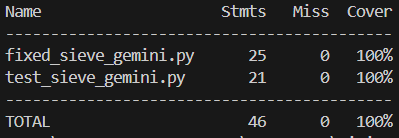

Висновок

Gemini дуже швидко і якісно виконав свою роботу. Він запропонував правильні тести, які покрили повністю функцію. Код оптимізований, немає повторювань, кожен тест в окремому методі, що дозволяє краще побачити, де саме сталася помилка.

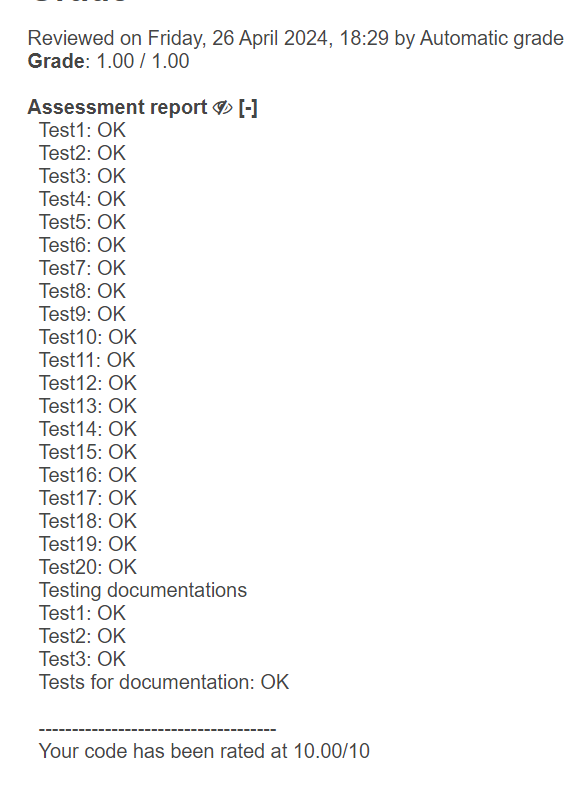